# Investigate projection

In [1]:
import h5py
import os
import matplotlib.pyplot as plt
import colorcet as cc
import pandas as pd
import numpy as np

In [ ]:
sdir = './projection'

In [2]:
with h5py.File(os.path.join(sdir, 'modes.h5'), 'r') as hf:
    modes = hf['modes'][:]
with h5py.File(os.path.join(sdir, 'projections.h5'), 'r') as hf:
    projections = hf['projections'][:]
with h5py.File(os.path.join(sdir, 'kvecs.h5'), 'r') as hf:
    kvecs = hf['kvecs'][:]
with h5py.File(os.path.join(sdir, 'omegas.h5'), 'r') as hf:
    omegas = hf['omegas'][:]
    
df = pd.DataFrame({'omegas': omegas, 'projections': projections, 'kx': kvecs[:,0]})

<HDF5 file "modes.h5" (mode r)>


## make dispersion plot
Path is from Gamma to X.

In [3]:
all_om = []
all_proj = []
all_k = []
for kk in df['kx'].unique():
    mdf = df.loc[df['kx']==kk]
    g_om = mdf['omegas'].to_numpy()
    g_proj = mdf['projections'].to_numpy()
    threshold = 3
    unique_omegas = []
    unique_proj = []
    rounded_omegas = np.round(g_om, threshold)
    #print('length of omegas, projs is ', len(rounded_omegas), len(these_projections))
    for ii, om in enumerate(rounded_omegas):
        if om in unique_omegas:
            add_where = np.where(np.array(unique_omegas) == om)
            #print(add_where[0][0])
            unique_proj[add_where[0][0]] += g_proj[ii]
        else:
            unique_omegas.append(om)
            unique_proj.append(g_proj[ii])
    # make a little df, and order the projections by value
    ldf = pd.DataFrame({'omegas': unique_omegas, 'projections': unique_proj})
    ldf = ldf.sort_values(by=['projections'])
    unique_omegas = list(ldf['omegas'].to_numpy())
    unique_proj = list(ldf['projections'].to_numpy())
    all_om += unique_omegas
    all_proj += unique_proj
    all_k += [kk]*len(unique_omegas)


summed projection for kx=0.0 is 5.9999999999982965
summed projection for kx=0.25 is 5.999999999994548
summed projection for kx=0.5 is 5.999999999999957
summed projection for kx=0.75 is 5.999999999994548


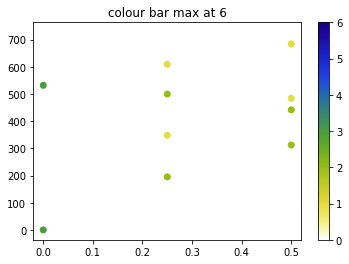

In [5]:
cmap = cc.cm['bgyw_r']
plt.scatter(all_k, all_om, c=all_proj, cmap=cmap, vmin=0, vmax=6)
plt.title('colour bar max at 6')
plt.xlim([-0.02, 0.52])
plt.colorbar()